In [1]:
%pylab notebook
import pycwt
import exdir
import exdir.plugins.quantities
import pathlib

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['figure.figsize'] = (9, 6)

In [34]:
project = 'septum-mec'

action_id = '1834-060319-2'

channel_group = 0

channel = 0 # 0-3

In [36]:
path = pathlib.Path(project)
exdir_file = exdir.File(path / 'actions'/ action_id / 'data'/ 'main.exdir',
                       plugins=exdir.plugins.quantities)
lfp_group = exdir_file[
    'processing/electrophysiology/channel_group_{}/LFP/LFP_timeseries_{}'.format(channel_group, channel)]
data = lfp_group['data'].data.flatten()

sampling_frequency = lfp_group['data'].attrs['sample_rate'].magnitude
sampling_period = 1 / sampling_frequency

times = arange(0, sampling_period * len(data), sampling_period)

In [37]:
stim_times = exdir_file['epochs']['open-ephys-epochs']['rhythm_fpga_100']['timestamps'].data.magnitude
stim_durations = exdir_file['epochs']['open-ephys-epochs']['rhythm_fpga_100']['durations'].data.magnitude

In [38]:
print('stimulation frequency', 1 / diff(stim_times).mean())

stimulation frequency 11.110683924321563


<IPython.core.display.Javascript object>


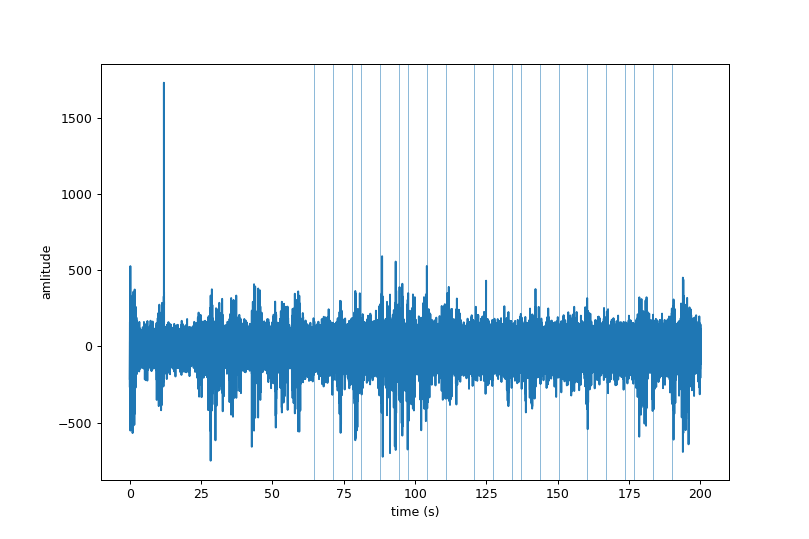

Text(0.5, 0, 'time (s)')

In [39]:
start_time = 0
stop_time = 200

mask = (start_time < times) & (times < stop_time) # seconds
mask_ts = (start_time < stim_times) & (stim_times < stop_time) # seconds

figure()
plot(times[mask], data[mask])
for t, d in zip(stim_times[mask_ts], stim_durations[mask_ts]):
    axvspan(t, t + d, alpha=.5)
ylabel('amlitude')
xlabel('time (s)')

In [31]:
def mask_coi(power, freqs, coi):
    periods = 1 / freqs
    for i in range(power.shape[1]):
        mask = periods > coi[i]
        power[mask, i] = nan

<IPython.core.display.Javascript object>


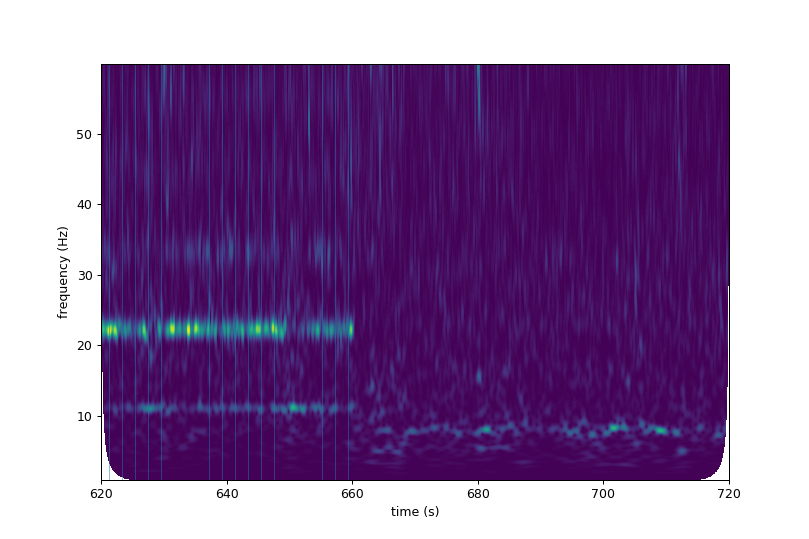

Text(0.5, 0, 'time (s)')

In [44]:
start_time = 620
stop_time = 720

mask = (start_time < times) & (times < stop_time) # seconds
mask_ts = (start_time < stim_times) & (stim_times < stop_time) # seconds

mother = pycwt.Morlet(20)
freqs = arange(1, 60, .1)

wave, scales, freqs, coi, fft, fftfreqs = pycwt.cwt(data[mask], sampling_period, freqs=freqs, wavelet=mother)

power = (numpy.abs(wave)) ** 2
power /= scales[:, None] #rectify the power spectrum according to the suggestions proposed by Liu et al. (2007)

mask_coi(power, freqs, coi)

figure()
contourf(times[mask], freqs, power, levels=100)
for t, d in zip(stim_times[mask_ts], stim_durations[mask_ts]):
    axvspan(t, t + d, alpha=.5)
    
ylabel('frequency (Hz)')
xlabel('time (s)')

<IPython.core.display.Javascript object>


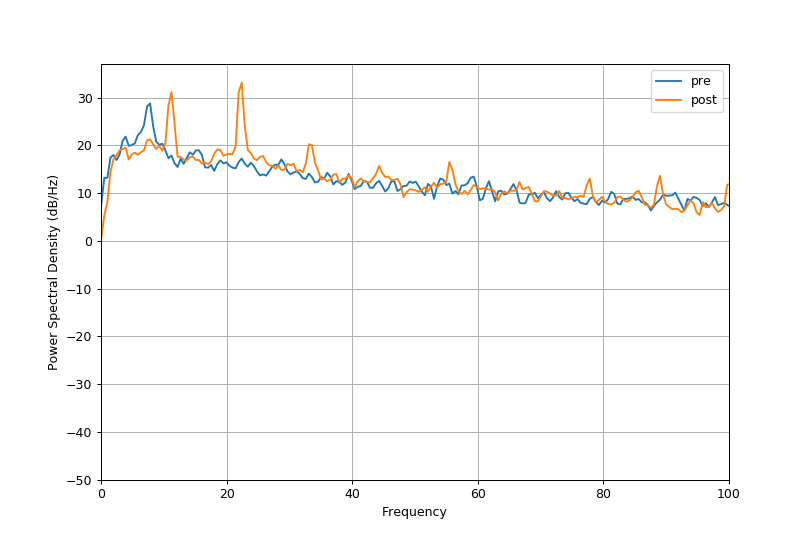

In [41]:
start_time_1 = 0
stop_time_1 = 60

start_time_2 = 100
stop_time_2 = 160

mask_1 = (start_time_1 < times) & (times < stop_time_1) # seconds
mask_2 = (start_time_2 < times) & (times < stop_time_2) # seconds

figure()
psd(data[mask_1], Fs=sampling_frequency, NFFT=2056, label='pre')
psd(data[mask_2], Fs=sampling_frequency, NFFT=2056, label='post')
xlim(0,100)
legend()